<a href="https://colab.research.google.com/github/shikharnathsil/NN/blob/main/NN0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df = pd.get_dummies(df, columns=['Geography'], prefix='Geography')
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True


In [10]:
# prompt: Using dataframe df: use standard scalar for columns CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Fit the scaler to the selected columns and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,True,False,True,False,False
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,True,False,False,False,True
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,True,False,True,False,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,True,False,True,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,True,False,False,False,True


In [20]:
y = df['Exited']
X = df.drop(columns=['Exited'])
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape)

(10000, 13) (10000,)


In [105]:
# create a sequential model with Keras
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) # Use Input layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [106]:
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3279 - loss: 0.8770 - val_accuracy: 0.3955 - val_loss: 0.7563
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4671 - loss: 0.7440 - val_accuracy: 0.5785 - val_loss: 0.6666
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6121 - loss: 0.6594 - val_accuracy: 0.7405 - val_loss: 0.6001
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7162 - loss: 0.6030 - val_accuracy: 0.8015 - val_loss: 0.5512
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7577 - loss: 0.5606 - val_accuracy: 0.8085 - val_loss: 0.5145
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7828 - loss: 0.5300 - val_accuracy: 0.8060 - val_loss: 0.4880
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7923 - loss: 0.5060 - val_accuracy: 0.8045 - val_loss: 0.4686
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8022 - loss: 0.4818 - val_accuracy: 0.8055 - 

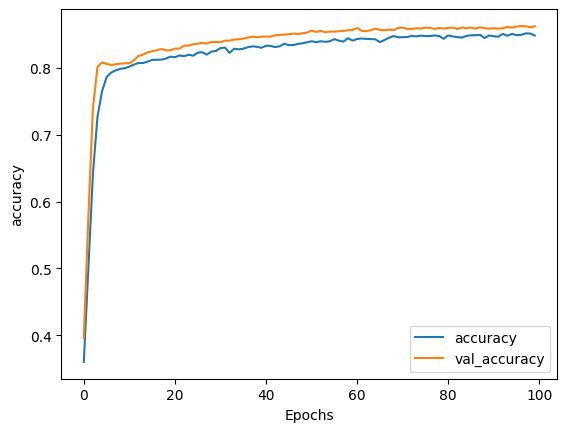

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

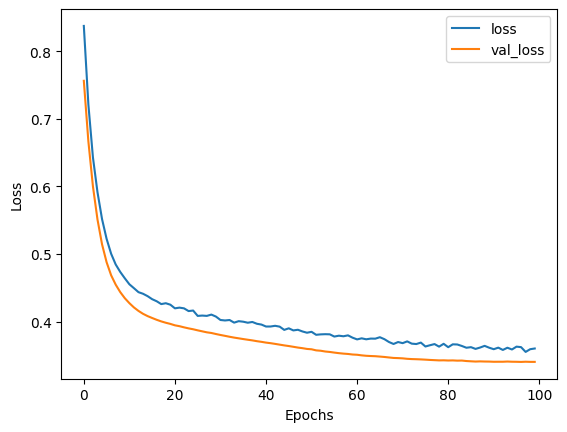

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [88]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [91]:
y_pred_new= model.predict(X_test.iloc[100:101,:])
y_pred_new = (y_pred_new > 0.5).astype(int)
y_pred_new.item()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1

In [92]:
y_test.iloc[100]

1

In [93]:
df.iloc[8:9]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
8,-1.547141,0.484225,-0.350204,1.05082,0.807737,0,1,-0.437329,0,False,True,True,False,False


In [94]:
df1 = pd.DataFrame({'CreditScore': 100000, 'Age': 35, 'Tenure': 3,
        'Balance': 100000, 'NumOfProducts': 3, 'HasCrCard': 1,
        'IsActiveMember': 0, 'EstimatedSalary': 100000,
        'Gender_Female': True, 'Gender_Male': False,
        'Geography_France': True, 'Geography_Germany': False,
        'Geography_Spain': False}, index=[0])

df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,100000,35,3,100000,3,1,0,100000,True,False,True,False,False


In [95]:
df1[columns_to_scale] = scaler.transform(df1[columns_to_scale])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1027.946696,-0.373958,-0.695982,0.376863,2.527057,1,0,-0.001569,True,False,True,False,False


In [96]:
y_pred1= model.predict(df1)
y_pred1 = (y_pred1 > 0.5).astype(int)
y_pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0]])

In [109]:
import pickle

In [110]:
pickle.dump(model, open('model.pkl', 'wb'))

In [111]:
mymodel = pickle.load(open('model.pkl', 'rb'))
y_pred2= mymodel.predict(df1)
y_pred2 = (y_pred2 > 0.5).astype(int)
y_pred2.item()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


0